Task - 1:
Dataset creation using make_regression of scikit-learn [Mark - 0]

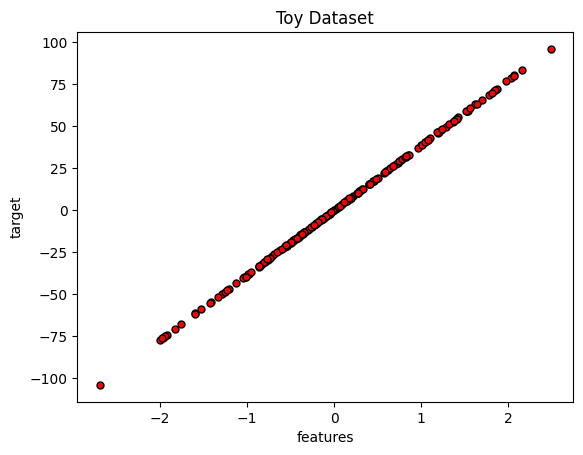

In [21]:
#importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




# Generating the dataset
X, y = make_regression(n_samples=190, n_features=1, noise=0.2, random_state=46)

# Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=46)

# Ploting  the generated dataset
plt.scatter(X, y, color='red', edgecolor='k', s=25)
plt.title("Toy Dataset")
plt.xlabel("features")
plt.ylabel("target")
plt.show()


Task - 2:
Two K-NN regressor implementations (from scratch)

Average of K-nearest neighbors [Marks - 5]
Weighted average of k nearest neighbors, with weights being inverse of distances from the k neighbors [Marks - 5]

In [22]:
import pandas as pd
file_path='regression_dataset.csv' #adding file path
data=pd.read_csv(file_path) # reading the csv file

#Displaying the first few rows of dataset
print(data.head())

#last column is target 
x=data.iloc[:,:-1].values #feature(all column except the last column)
y=data.iloc[:,-1].values # target variable(last column)


#spliting the dataset into training and testing phase
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=46)



   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     target
0   2.056544   0.606851   0.482688  -1.130888   0.420094  74.905613
1  -0.799192  -0.645964  -0.182896  -0.482744   1.374876 -41.649588
2   1.076007  -0.796026  -0.751969   0.021312  -0.319054 -24.182866
3  -0.103255  -0.828497   1.489863  -1.643189  -1.600904 -87.094505
4  -2.063403   0.503252  -0.645572  -0.317350  -1.661083 -86.122029


In [23]:


class knn_regression_average:

    #initializing regressor with no of neighbours is k
    def __init__(self, k=3):
        self.k=k
        
    def fit(self, x_train, y_train):  #fit is used in sklearn to train model
        self.x_train=x_train  # x_train represent training data for feature especially matrix/aray
        self.y_train=y_train  # y_train corrosponding target values( labels) of training data

    def predict (self, x_test):
        prediction_=[]
        for test_point in x_test:
            #finding the distance from the test point to all train point
            dist =np.linalg.norm(self.x_train -test_point ,axis=1)
            #finding the indeces of k nearest neighbours
            k_ind=np.argsort(dist)[:self.k]

            #label aggregation 
            #for classification
            k_near_lab=self.y_train[k_ind]
            #most_comm_lab=mode(k_lear_lab).mode[0]

            #for reggression
            predict2=np.mean(k_near_lab)
            prediction_.append(predict2)
        return np.array(prediction_)


#creating and training the knn regressor
KNN_AVG=knn_regression_average(k=5)
KNN_AVG.fit(X_train, y_train)
#prediction of the test set
predict_avg=KNN_AVG.predict(X_test)
#performance evaluation using MSE
mse_avg =mean_squared_error(y_test, predict_avg)
print(f'knn regression_average(mse): {mse_avg}')

knn regression_average(mse): 431.9371915829422


In [24]:
class Knn_regression_with_inverse_weight:
    def __init__(self, k=3):
        self.k=k

    def fit(self, x_train, y_train):
        self.x_train=x_train
        self.y_train=y_train

    def predictt(self,x_test):
        prediction=[]
        for test_point in X_test:
            
            #finding the distance from the test point to all train point
            dist =np.linalg.norm(self.x_train -test_point ,axis=1)
            #finding the indeces of k nearest neighbours
            k_ind=np.argsort(dist)[:self.k] #slicing to find the index
            k_near_lab=self.y_train[k_ind]
            k_near_dis=dist[k_ind]
            weight_s=1/(k_near_dis +1e-5) 
            #calculation of weight as inverse of distance and adding a small constant
            #to avoiding the division by zero
            prediction.append(np.dot(weight_s,k_near_lab)/np.sum(weight_s))
        return np.array(prediction)

#testing the knn regression_with_weighted_average
Knn_Weighted=Knn_regression_with_inverse_weight(k=5)
Knn_Weighted.fit(X_train, y_train)
predicted_weighted=Knn_Weighted.predictt(X_test)
mse_weighted=mean_squared_error(y_test,predicted_weighted)
print(f'Knn Regression_using_inverse_weight(mse): {mse_weighted}')
            

Knn Regression_using_inverse_weight(mse): 409.2495564447537


Task - 3:
Plot regression metric (mean squared error) against different values of k {3, 7, 11} and different distance measures {p=2, p=1, p=5}and report the k value and distance measure combination that gave the best performance (lowest MSE) [Marks - 4]

In [25]:
# importing the libraries 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [26]:
#parameter that should be tested 
k_val=[3,7,11]
p_val=[2,1,5]
result=[]

In [27]:
#evaluating the model for each k and each p
for k in k_val:
    for p in p_val:
        Knn=KNeighborsRegressor(n_neighbors=k,p=p, algorithm='brute')
        #n_neighbors no of neighbors for consideration
        #p=1, manhattan distance
        #p=2 , minkowski distacne
        #brute--bruce force method is used
        Knn.fit(X_train, y_train)
        prediction=Knn.predict(X_test) #use trained modedl for prediction on tst data
        Mse=mean_squared_error(y_test, prediction) # compute mse b/t actual and predicted data
        result.append((k,p, Mse)) # storing the mse value
        print(f'k={k} , p={p} and Mse={Mse}')
        
        
    

k=3 , p=2 and Mse=444.0859445186962
k=3 , p=1 and Mse=474.0479894723799
k=3 , p=5 and Mse=447.574190204105
k=7 , p=2 and Mse=471.9185801432658
k=7 , p=1 and Mse=484.6237018745326
k=7 , p=5 and Mse=479.79870346738846
k=11 , p=2 and Mse=502.5198445582323
k=11 , p=1 and Mse=534.1843648703995
k=11 , p=5 and Mse=505.995501638688


In [28]:
#Finding the best performace that is lowest Mse
Best_comb_result=min(result,key=lambda x:x[2])
#result is list of tuple contain the value (k,p, mse)
print(f'Best_Combination is : k= {Best_comb_result[0]} , p={Best_comb_result[1]} and Mse ={Best_comb_result[2]}')

Best_Combination is : k= 3 , p=2 and Mse =444.0859445186962


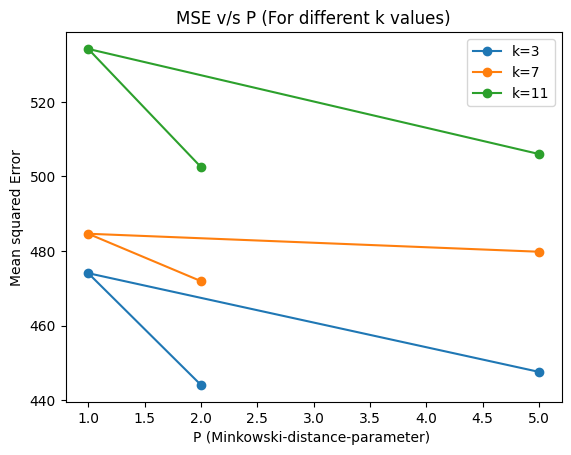

In [29]:
#Plotting the regressosr metric against mse for each k

fig, ax=plt.subplots()
for k in k_val:
    mse1 =[result1[2] for result1 in result if result1[0] ==k]
    ax.plot(p_val, mse1, marker='o', linestyle='-',label=f'k={k}' )

ax.set_xlabel('P (Minkowski-distance-parameter) ')
ax.set_ylabel('Mean squared Error')
ax.set_title('MSE v/s P (For different k values)')
ax.legend() #To displaying the legend
plt.show()
    

Task - 4:
Implement KNN regression using scikit-learn, with the same values of k and p as above

Note - one argument of scikit-learn KNN is algorithm='auto' and acceptable values are {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'. For this task use 'brute' setting.
[Marks - 4]

In [30]:
#evaluating the model for each k and each p
#considering the values of k and p defined in earlier task
result=[]
for k in k_val:
    for p in p_val:
        Knn=KNeighborsRegressor(n_neighbors=k,p=p, algorithm='brute')
        #n_neighbors no of neighbors for consideration
        #p=1, manhattan distance
        #p=2 , minkowski distacne
        #brute--bruce force method is used
        Knn.fit(X_train, y_train)
        prediction=Knn.predict(X_test) #use trained modedl for prediction on tst data
        Mse=mean_squared_error(y_test, prediction) # compute mse b/t actual and predicted data
        result.append((k,p, Mse)) # storing the mse value
        print(f'k={k} , p={p} and Mse={Mse}')
        
#Finding the best performace that is lowest Mse
Best_comb_result=min(result,key=lambda x:x[2])
#result is list of tuple contain the value (k,p, mse)
print(f'Best_Combination is : k= {Best_comb_result[0]} , p={Best_comb_result[1]} and Mse ={Best_comb_result[2]}')



    

k=3 , p=2 and Mse=444.0859445186962
k=3 , p=1 and Mse=474.0479894723799
k=3 , p=5 and Mse=447.574190204105
k=7 , p=2 and Mse=471.9185801432658
k=7 , p=1 and Mse=484.6237018745326
k=7 , p=5 and Mse=479.79870346738846
k=11 , p=2 and Mse=502.5198445582323
k=11 , p=1 and Mse=534.1843648703995
k=11 , p=5 and Mse=505.995501638688
Best_Combination is : k= 3 , p=2 and Mse =444.0859445186962


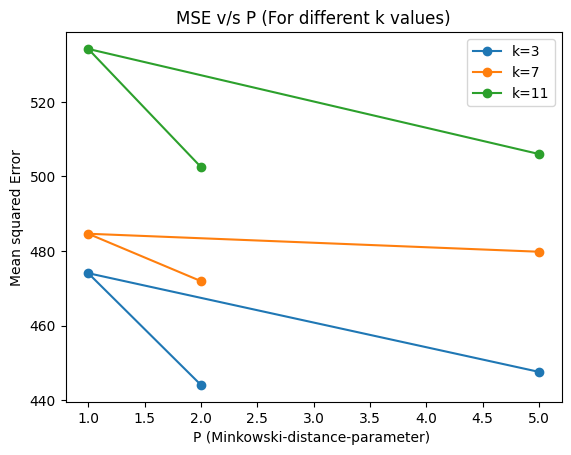

In [31]:
#Plotting the regressosr metric against mse for each k

fig, ax=plt.subplots()
for k in k_val:
    mse1 =[result1[2] for result1 in result if result1[0] ==k]
    ax.plot(p_val, mse1, marker='o', linestyle='-',label=f'k={k}' )

ax.set_xlabel('P (Minkowski-distance-parameter) ')
ax.set_ylabel('Mean squared Error')
ax.set_title('MSE v/s P (For different k values)')
ax.legend() #To displaying the legend
plt.show()
    

ask - 5:
Comparison with scikit-learn's implementation - Does the optimal values of k and distance metric as well as best performance level of the from scratch implementation match with those given by Sklearn?

[Marks - 2]

In [32]:
#Average of k-Nearest Neighbors--
class knn_regression_average:

    #initializing regressor with no of neighbours is k
    def __init__(self, k=3):
        self.k=k
        
    def fit(self, x_train, y_train):  #fit is used in sklearn to train model
        self.x_train=x_train  # x_train represent training data for feature especially matrix/aray
        self.y_train=y_train  # y_train corrosponding target values( labels) of training data

    def predict (self, x_test):
        prediction_=[]
        for test_point in x_test:
            #finding the distance from the test point to all train point
            dist =np.linalg.norm(self.x_train -test_point ,axis=1)
            #finding the indeces of k nearest neighbours
            k_ind=np.argsort(dist)[:self.k]

            #label aggregation 
            #for classification
            k_near_lab=self.y_train[k_ind]
            #most_comm_lab=mode(k_lear_lab).mode[0]

            #for reggression
            predict2=np.mean(k_near_lab)
            prediction_.append(predict2)
        return np.array(prediction_)



In [33]:
#weighted average of k-Nearest Neibhours--
class Knn_regression_with_inverse_weight:
    def __init__(self, k=3):
        self.k=k

    def fit(self, x_train, y_train):
        self.x_train=x_train
        self.y_train=y_train

    def predictt(self,x_test):
        prediction=[]
        for test_point in X_test:
            
            #finding the distance from the test point to all train point
            dist =np.linalg.norm(self.x_train -test_point ,axis=1)
            #finding the indeces of k nearest neighbours
            k_ind=np.argsort(dist)[:self.k] #slicing to find the index
            k_near_lab=self.y_train[k_ind]
            k_near_dis=dist[k_ind]
            weight_s=1/(k_near_dis +1e-5) 
            #calculation of weight as inverse of distance and adding a small constant
            #to avoiding the division by zero
            prediction.append(np.dot(weight_s,k_near_lab)/np.sum(weight_s))
        return np.array(prediction)


In [34]:
result_scr=[]

#Evaluating the model for each comination of k and p from scratch
for k in k_val:
    for p in p_val:
        # By Average knn
        knn_av= knn_regression_average(k=k)
        knn_av.fit(X_train, y_train)
        prediction_av=knn_av.predict(X_test)
        mse_av=mean_squared_error(y_test,prediction_av)
        result_scr.append((k,p,'average',mse_av))

        #By Weighted Knn
        knn_wt=Knn_regression_with_inverse_weight(k=k)
        knn_wt.fit(X_train,y_train)
        prediction_wt=knn_wt.predictt(X_test)
        mse_wt=mean_squared_error(y_test,prediction_wt)
        result_scr.append((k,p,'Weighted',mse_wt))
        

In [35]:
#Evaluating the best combination that is lowest MSE for implementation by scratch
Best_scr_comb=min(result_scr, key=lambda x:x[3])
print(f'Best combination by Scratch is : k = {Best_scr_comb[0]}, p = {Best_scr_comb[1]}, MSE= { Best_scr_comb[3]}')

Best combination by Scratch is : k = 3, p = 2, MS E= 423.1954748479798


In [36]:
#By Sciit-Learn's Implementation , evaluating and comparing the mse
result_scr1=[]

# for each combination of k and p, evaluating the model
for k in k_val:
    for p in p_val:
        knn=KNeighborsRegressor(n_neighbors=k, p=p, algorithm='brute')
        knn.fit(X_train, y_train)
        prediction_sc=knn.predict(X_test)
        mse_sc=mean_squared_error(y_test, prediction_sc)
        result_scr1.append((k,p,mse_sc))


In [41]:
#By scikit-learn implementation finding the best combination
Best_sc_cmb=min(result_scr1,key=lambda x:x[2])
print(f'Best combination by scikit-learn is : k = {Best_sc_cmb[0]}, p = {Best_sc_cmb[1]}, MSE = {Best_sc_cmb[2]}')

Best combination by scikit-learn is : k = 3, p = 2, MSE = 444.0859445186962


In [43]:
#Comparing the Best Combination from both implementation

print(f'Best combination by Scratch is : k = {Best_scr_comb[0]}, p = {Best_scr_comb[1]}, MSE= { Best_scr_comb[3]}')

print(f'Best combination by scikit-learn is : k = {Best_sc_cmb[0]}, p = {Best_sc_cmb[1]}, MSE = {Best_sc_cmb[2]}')

Best combination by Scratch is : k = 3, p = 2, MSE= 423.1954748479798
Best combination by scikit-learn is : k = 3, p = 2, MSE = 444.0859445186962
